<a href="https://colab.research.google.com/github/Shnku/pythoning_stuff/blob/proj/NN/effNet_bad_df_sepr_data_with_visul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')

#shared path to drive
SHARED_PATH="/content/drive/MyDrive/Classroom/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours"
#direct path to drive
DIRECT_PATH="/content/drive/MyDrive/Classroom/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours"

# Determine the data path based on the existence of shared or direct paths
root_path = SHARED_PATH if os.path.exists(SHARED_PATH) else DIRECT_PATH if os.path.exists(DIRECT_PATH) else None

DATA_PATH = ''
# Print the chosen path or an error message
if root_path:
    DATA_PATH = root_path + "/Proj2_Heritage_places_in_CGR_classify"
    print(f"Using path: {root_path}\n\n{os.listdir(DATA_PATH)}")
else:
    print("Neither shared nor direct path exists. Please check the paths.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using path: /content/drive/MyDrive/Classroom/ChandernagoreCollegeSemVI-Addon 2025 Sem VI Computer Science Honours

['Data', 'expr1.ipynb', 'classify_train_test_copycode.ipynb', 'Untitled.ipynb']


In [ ]:
import random
import numpy as np
import torch

RANDOM_SEED = 42

def set_all_seeds(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
        torch.backends.cudnn.deterministic = True
        torch.backends.cudnn.benchmark = False
    os.environ['PYTHONHASHSEED'] = str(seed)

set_all_seeds(RANDOM_SEED)

In [ ]:
# Define device (CPU or GPU)
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(DEVICE)
# Access the input features of the final linear layer within the classifier
if torch.cuda.is_available():
    print(torch.cuda.device_count())
    print(torch.cuda.get_arch_list())
    print(torch.cuda.get_device_capability())
    print(torch.cuda.clock_rate())
    print(torch.cuda.get_device_name())
    print(torch.cuda.get_device_properties(0))
    print(torch.cuda.temperature())
    print(torch.cuda.power_draw())
    print(torch.cuda.utilization())


cuda
1
['sm_50', 'sm_60', 'sm_70', 'sm_75', 'sm_80', 'sm_86', 'sm_90']
(7, 5)
585
Tesla T4
_CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15095MB, multi_processor_count=40, uuid=4ef0d273-e36b-b8bf-8efb-0b7740086d57, L2_cache_size=4MB)
69
29099
0


['mondir', 'jora_ghat', 'charch', 'patalbari', 'musium', 'clock_tower']
['ghat_00016.jpg', 'ghat_00015.jpg', 'ghat_00014.JPG', 'ghat_00012.webp', 'ghat_00011.jpg', 'ghat_00010.webp', 'ghat_0009.jpg', 'ghat_0008.jpg', 'ghat_0007.jpg', 'ghat_0006.jpg', 'ghat_0005.webp', 'ghat_0004.jpeg', 'ghat_0003.jpg', 'ghat_0002.jpg', 'ghat_0001.jpg', 'ghat_00017.jpeg', 'ghat_00013.jpeg']


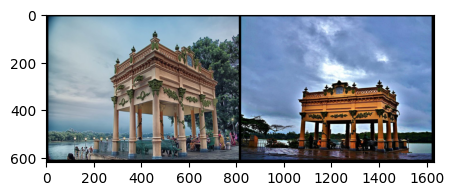

In [ ]:
from pathlib import Path
import matplotlib.pyplot as plt
from torchvision.io import decode_image
from torchvision.transforms import Resize # Import Resize transform
from torchvision.utils import make_grid


print(os.listdir(DATA_PATH+'/Data'))
print(os.listdir(DATA_PATH+'/Data/jora_ghat'))

dog1_int = decode_image(str(Path(DATA_PATH+'/Data/jora_ghat') / 'ghat_00016.jpg'))
dog2_int = decode_image(str(Path(DATA_PATH+'/Data/jora_ghat') / 'ghat_00011.jpg'))

# Define a target size for resizing (choose an appropriate size for your images)
target_size = (600, 800) # Example: height=600, width=800

# Create a Resize transform
resize_transform = Resize(target_size)

# Apply the resize transform to both tensors
dog1_resized = resize_transform(dog1_int)
dog2_resized = resize_transform(dog2_int)

# Update the dog_list with the resized tensors
dog_list = [dog1_resized, dog2_resized]

grid = make_grid(dog_list, padding=10)
# grid_image = ToPILImage()(grid)
plt.figure(figsize=(5, 5))
plt.imshow(grid.permute(1, 2, 0)) # (0-C/1-W/2-H) -> (1-W/2-H/0-C)
plt.show()

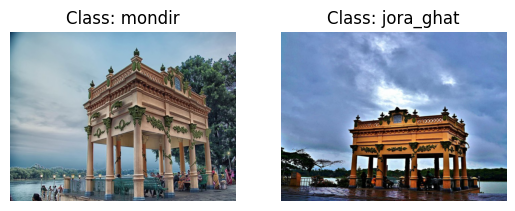

<Figure size 200x200 with 0 Axes>

In [ ]:
class_names = os.listdir(DATA_PATH+'/Data')
# To show class names, you would typically add text labels to the plot
# This requires more advanced plotting techniques, potentially using subplots
# or manually adding text annotations. Here's a conceptual example:

# Example of adding text labels (requires more setup for accurate placement)
fig, axes = plt.subplots(1, len(dog_list))
plt.figure(figsize=(2, 2))
for i, img in enumerate(dog_list):
    axes[i].imshow(img.permute(1, 2, 0))
    axes[i].set_title(f"Class: {class_names[i]}") # Assuming you have a list of class names
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
from IPython.display import display

root_dir = DATA_PATH+'/Data'
image_dict = {}
for folder in os.listdir(root_dir):
    folder_path = os.path.join(root_dir, folder)
    if os.path.isdir(folder_path):
        image_dict[folder] = []
        for filename in os.listdir(folder_path):
            # if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = str(Path(folder_path) / filename)
            image_dict[folder].append(image_path)

data = []
for class_name, images in image_dict.items():
    for img_path in images:
        data.append({ 'path': img_path,'class': class_name})

df = pd.DataFrame(data)

# print(image_dict.keys)
# print(data)
print(df)
print(df.describe())

                                                 path        class
0   /content/drive/MyDrive/Classroom/Chandernagore...       mondir
1   /content/drive/MyDrive/Classroom/Chandernagore...       mondir
2   /content/drive/MyDrive/Classroom/Chandernagore...       mondir
3   /content/drive/MyDrive/Classroom/Chandernagore...       mondir
4   /content/drive/MyDrive/Classroom/Chandernagore...       mondir
..                                                ...          ...
68  /content/drive/MyDrive/Classroom/Chandernagore...  clock_tower
69  /content/drive/MyDrive/Classroom/Chandernagore...  clock_tower
70  /content/drive/MyDrive/Classroom/Chandernagore...  clock_tower
71  /content/drive/MyDrive/Classroom/Chandernagore...  clock_tower
72  /content/drive/MyDrive/Classroom/Chandernagore...  clock_tower

[73 rows x 2 columns]
                                                     path      class
count                                                  73         73
unique                             

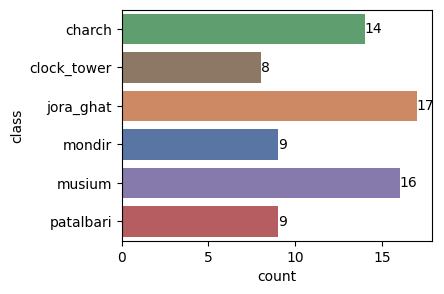

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 3))
ax = sns.countplot(y='class', data=df, hue='class', palette='deep',order=sorted(df['class'].unique()))

# Add bar counts
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets without stratify
no_sfy_train_df, no_sfy_test_df = train_test_split(df, test_size=0.2, random_state=42)

# splitting a dataset in such a way that the proportion of samples in each class is the same across the training and testing sets.
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['class'])

print('------------',len(train_df),'----------------')
display(train_df.head())
print('------------',len(test_df),'----------------')
display(test_df.head())

------------ 58 ----------------


,path,class
40,/content/drive/MyDrive/Classroom/Chandernagore...,patalbari
51,/content/drive/MyDrive/Classroom/Chandernagore...,musium
19,/content/drive/MyDrive/Classroom/Chandernagore...,jora_ghat
1,/content/drive/MyDrive/Classroom/Chandernagore...,mondir
61,/content/drive/MyDrive/Classroom/Chandernagore...,musium


------------ 15 ----------------


,path,class
2,/content/drive/MyDrive/Classroom/Chandernagore...,mondir
29,/content/drive/MyDrive/Classroom/Chandernagore...,charch
67,/content/drive/MyDrive/Classroom/Chandernagore...,clock_tower
57,/content/drive/MyDrive/Classroom/Chandernagore...,musium
24,/content/drive/MyDrive/Classroom/Chandernagore...,jora_ghat


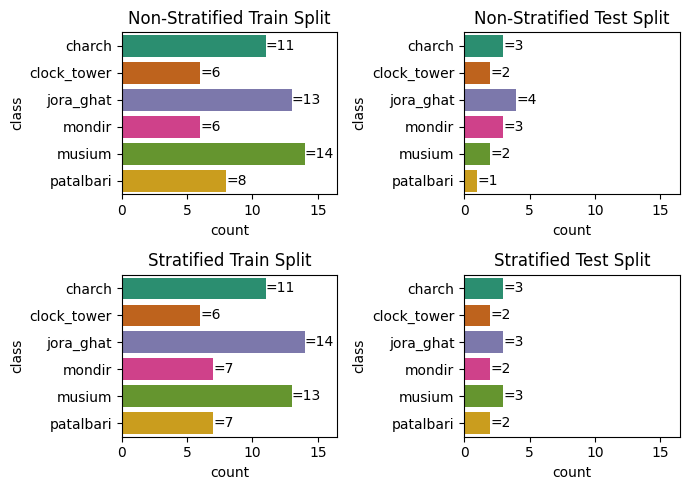

In [ ]:
# Calculate the maximum count across all splits
max_count = max(
    no_sfy_train_df['class'].value_counts().max(),
    no_sfy_test_df['class'].value_counts().max(),
    train_df['class'].value_counts().max(),
    test_df['class'].value_counts().max()
)+2.5

# Create the subplots
fig, axes = plt.subplots(2, 2,figsize=(7, 5)) # You can adjust the figure size as neeed

# Get the unique class names in the desired order (e.g., alphabetical)
class_order = sorted(df['class'].unique())

# Define a consistent color palette with enough colors for all classes
# You can choose any seaborn palette or provide a list of custom colors
consistent_palette = sns.color_palette("Dark2", n_colors=len(class_order))

# Define the helper function to add count labels
def add_count_labels(ax):
    for brs in ax.containers:
        ax.bar_label(brs, fmt='=%d')

# Plot and set xlim for each subplot, and add text annotations
sns.countplot(y='class', data=no_sfy_train_df, hue='class', palette=consistent_palette, ax=axes[0, 0], hue_order=class_order, order=class_order)
axes[0, 0].set_title('Non-Stratified Train Split')
axes[0, 0].set_xlim(0, max_count)
add_count_labels(axes[0, 0])

sns.countplot(y='class', data=no_sfy_test_df, hue='class', palette=consistent_palette, ax=axes[0, 1],hue_order=class_order, order=class_order)
axes[0, 1].set_title('Non-Stratified Test Split')
axes[0, 1].set_xlim(0, max_count)
add_count_labels(axes[0, 1])

sns.countplot(y='class', data=train_df, hue='class', palette=consistent_palette, ax=axes[1, 0], hue_order=class_order, order=class_order)
axes[1, 0].set_title('Stratified Train Split')
axes[1, 0].set_xlim(0, max_count)
add_count_labels(axes[1, 0])

sns.countplot(y='class', data=test_df, hue='class', palette=consistent_palette, ax=axes[1, 1],hue_order=class_order, order=class_order)
axes[1, 1].set_title('Stratified Test Split')
axes[1, 1].set_xlim(0, max_count)
add_count_labels(axes[1, 1])

plt.tight_layout()
plt.show()

In [ ]:
from torch.utils.data import Dataset, DataLoader
from torchvision.io import read_image
from torchvision import transforms
from PIL import Image
import torch

# Assuming you have your train_df and test_df DataFrames from previous cells

# 1. Create a custom Dataset class
class ImageDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform
        # Create a mapping from class name to index
        self.class_to_idx = {cls_name: i for i, cls_name in enumerate(dataframe['class'].unique())}

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx]['path']
        label_name = self.dataframe.iloc[idx]['class']

        # read_image returns a tensor with shape [C, H, W]
        image = Image.open(img_path).convert('RGB') #RGB channel must
        # Apply transformations if specified
        if self.transform:
            image = self.transform(image)
        # Convert label name to index
        label = self.class_to_idx[label_name]

        return image, label

# 2. Define transformations (you might need more)
# You can define a composed transform sequence here
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),       # Resize images
    # transforms.ConvertImageDtype(torch.float), # Convert to float (scales to [0, 1])
    transforms.ToTensor(), # Convert to tensor (scales to [0, 1])
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # Normalize
])


# 3. Create Dataset instances
train_dataset = ImageDataset(train_df, transform=data_transforms)
test_dataset = ImageDataset(test_df, transform=data_transforms)


# 4. Create DataLoader instances
BATCH_SIZE = 2

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(train_loader)
print(test_loader)

# Example of iterating through the DataLoader
print(train_dataset.class_to_idx)
print(len(train_dataset.class_to_idx))
for images, labels in train_loader:
    print(f"Batch of images shape: {images.shape}")
    print(f"Batch of labels shape: {labels.shape}")
    break # Just show one batch

{'patalbari': 0, 'musium': 1, 'jora_ghat': 2, 'mondir': 3, 'charch': 4, 'clock_tower': 5}
6
Batch of images shape: torch.Size([2, 3, 224, 224])
Batch of labels shape: torch.Size([2])


In [ ]:
from torchvision.models import resnet18, ResNet18_Weights
from torchvision.models import efficientnet

# Load torch's ResNet18 model
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

# MODEL = models.resnet18(weights ='ResNet18_Weights.DEFAULT')  # pretrained = True/false
# rsnt18_model = MODELs.resnet18(weights = None) # pretrained = False)

# MODEL = efficientnet.efficientnet_v2_s(pretrained=True)
MODEL = efficientnet.efficientnet_v2_m(weights=None)

# modifying the last layer
last_layer_in = MODEL.classifier[1].in_features
no_of_classes = len(train_dataset.class_to_idx)
print(f"last layer output for model = {last_layer_in} -> convert to {no_of_classes} output")
# Modify the final linear layer to have the correct number of output classes
MODEL.classifier[1] = nn.Linear(last_layer_in, no_of_classes)
# Move model to device
MODEL = MODEL.to(DEVICE)
print(MODEL)


loss_fn = nn.CrossEntropyLoss() # criterion = torch.nn.CrossEntropyLoss()

optimizer = optim.Adam(MODEL.parameters(), lr=0.001) # lr = learning rate
print(optimizer)

last layer output for model = 1280 -> convert to 6 output
EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 24, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): FusedMBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(24, 24, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(24, eps=0.00

In [ ]:
from tqdm import tqdm

def train_NN(model, train_loader, test_loader, loss_function, optim, n_epochs=10):
    loss_list=[]
    for epoch in tqdm(range(n_epochs)):
        model.train()  # Set the model to training mode
        training_loss = [] # list to store the training loss for each batch

        for i_image, i_label in train_loader:
            i_image = i_image.to(DEVICE)
            i_label = i_label.to(DEVICE)

            optimizer.zero_grad() # Zero out the gradients to prevent accumulation
            output = model(i_image) # Get the model's output for the current batch of imgs
            loss = loss_function(output, i_label) # Calculate the loss using the defined loss function
            loss.backward()  # Perform backpropagation to compute gradients
            optimizer.step()  # Update the model's weights using the optimizer

            training_loss.append(loss.item())

        print("Training loss at", epoch, "iteration is", np.mean(training_loss))
        loss_list.append(np.mean(training_loss))
        # eval_model_on_test(model,test_loader)
    print("Training done.....................")
    return loss_list


loss=train_NN(MODEL, train_loader, test_loader, loss_fn, optimizer, n_epochs=100)

  1%|          | 1/100 [00:04<08:10,  4.95s/it]

Training loss at 0 iteration is 1.7576208895650403


  2%|▏         | 2/100 [00:09<08:07,  4.97s/it]

Training loss at 1 iteration is 1.7968305801523143


  3%|▎         | 3/100 [00:14<07:45,  4.80s/it]

Training loss at 2 iteration is 1.7610898141203255


  4%|▍         | 4/100 [00:19<07:59,  5.00s/it]

Training loss at 3 iteration is 1.753341687136683


  5%|▌         | 5/100 [00:24<07:39,  4.84s/it]

Training loss at 4 iteration is 1.7622207485396286


  6%|▌         | 6/100 [00:28<07:25,  4.74s/it]

Training loss at 5 iteration is 1.7327523190399696


  7%|▋         | 7/100 [00:34<07:39,  4.94s/it]

Training loss at 6 iteration is 1.7801877342421433


  8%|▊         | 8/100 [00:38<07:23,  4.82s/it]

Training loss at 7 iteration is 1.7344722706696083


  9%|▉         | 9/100 [00:43<07:19,  4.83s/it]

Training loss at 8 iteration is 1.7526333866448238


 10%|█         | 10/100 [00:48<07:21,  4.90s/it]

Training loss at 9 iteration is 1.7554605377131496


 11%|█         | 11/100 [00:53<07:06,  4.80s/it]

Training loss at 10 iteration is 1.7441034522549859


 12%|█▏        | 12/100 [00:58<07:15,  4.95s/it]

Training loss at 11 iteration is 1.805119851539875


 13%|█▎        | 13/100 [01:03<06:58,  4.81s/it]

Training loss at 12 iteration is 1.7876071724398384


 14%|█▍        | 14/100 [01:07<06:46,  4.73s/it]

Training loss at 13 iteration is 1.7564927832833652


 15%|█▌        | 15/100 [01:12<06:56,  4.90s/it]

Training loss at 14 iteration is 1.7873124583014126


 16%|█▌        | 16/100 [01:17<06:43,  4.80s/it]

Training loss at 15 iteration is 1.7847124954749798


 17%|█▋        | 17/100 [01:22<06:35,  4.77s/it]

Training loss at 16 iteration is 1.8009346682449867


 18%|█▊        | 18/100 [01:27<06:40,  4.88s/it]

Training loss at 17 iteration is 1.7741741435281162


 19%|█▉        | 19/100 [01:31<06:27,  4.78s/it]

Training loss at 18 iteration is 1.7572702210524986


 20%|██        | 20/100 [01:37<06:32,  4.90s/it]

Training loss at 19 iteration is 1.7923280247326554


 21%|██        | 21/100 [01:41<06:23,  4.85s/it]

Training loss at 20 iteration is 1.771340933339349


 22%|██▏       | 22/100 [01:46<06:11,  4.76s/it]

Training loss at 21 iteration is 1.7831623019843266


 23%|██▎       | 23/100 [01:51<06:18,  4.91s/it]

Training loss at 22 iteration is 1.7674437226920292


 24%|██▍       | 24/100 [01:56<06:04,  4.79s/it]

Training loss at 23 iteration is 1.749401413161179


 25%|██▌       | 25/100 [02:00<05:52,  4.70s/it]

Training loss at 24 iteration is 1.7681986257947724


 26%|██▌       | 26/100 [02:05<06:00,  4.87s/it]

Training loss at 25 iteration is 1.7861391388136765


 27%|██▋       | 27/100 [02:10<05:48,  4.77s/it]

Training loss at 26 iteration is 1.771606260332568


 28%|██▊       | 28/100 [02:15<05:51,  4.88s/it]

Training loss at 27 iteration is 1.761797699435004


 29%|██▉       | 29/100 [02:20<05:46,  4.88s/it]

Training loss at 28 iteration is 1.7088776045832141


 30%|███       | 30/100 [02:24<05:34,  4.77s/it]

Training loss at 29 iteration is 1.7835124278890675


 31%|███       | 31/100 [02:30<05:38,  4.91s/it]

Training loss at 30 iteration is 1.7607212436610256


 32%|███▏      | 32/100 [02:34<05:25,  4.79s/it]

Training loss at 31 iteration is 1.7696710249473309


 33%|███▎      | 33/100 [02:39<05:15,  4.71s/it]

Training loss at 32 iteration is 1.7537084530139793


 34%|███▍      | 34/100 [02:44<05:22,  4.89s/it]

Training loss at 33 iteration is 1.8185255897456203


 35%|███▌      | 35/100 [02:49<05:12,  4.80s/it]

Training loss at 34 iteration is 1.7740675580912624


 36%|███▌      | 36/100 [02:53<05:07,  4.81s/it]

Training loss at 35 iteration is 1.8244833288521602


 37%|███▋      | 37/100 [02:58<05:05,  4.86s/it]

Training loss at 36 iteration is 1.7653328755806232


 38%|███▊      | 38/100 [03:03<04:54,  4.75s/it]

Training loss at 37 iteration is 1.738568902015686


 39%|███▉      | 39/100 [03:08<04:58,  4.89s/it]

Training loss at 38 iteration is 1.7864725219792332


 40%|████      | 40/100 [03:13<04:48,  4.81s/it]

Training loss at 39 iteration is 1.7825868335263482


 41%|████      | 41/100 [03:17<04:40,  4.75s/it]

Training loss at 40 iteration is 1.7351082892253482


 42%|████▏     | 42/100 [03:23<04:45,  4.92s/it]

Training loss at 41 iteration is 1.7389088869094849


 43%|████▎     | 43/100 [03:27<04:33,  4.79s/it]

Training loss at 42 iteration is 1.732108235359192


 44%|████▍     | 44/100 [03:32<04:27,  4.78s/it]

Training loss at 43 iteration is 1.6947500952358903


 45%|████▌     | 45/100 [03:37<04:28,  4.88s/it]

Training loss at 44 iteration is 1.757726759746157


 46%|████▌     | 46/100 [03:42<04:18,  4.78s/it]

Training loss at 45 iteration is 1.7738894183060219


 47%|████▋     | 47/100 [03:47<04:18,  4.87s/it]

Training loss at 46 iteration is 1.7673966226906612


 48%|████▊     | 48/100 [03:51<04:11,  4.84s/it]

Training loss at 47 iteration is 1.7683367318120495


 49%|████▉     | 49/100 [03:56<04:02,  4.76s/it]

Training loss at 48 iteration is 1.7075459833802848


 50%|█████     | 50/100 [04:01<04:06,  4.93s/it]

Training loss at 49 iteration is 1.7549548683495357


 51%|█████     | 51/100 [04:07<04:07,  5.04s/it]

Training loss at 50 iteration is 1.7758763083096207


 52%|█████▏    | 52/100 [04:11<03:58,  4.96s/it]

Training loss at 51 iteration is 1.7545846495135078


 53%|█████▎    | 53/100 [04:17<03:55,  5.01s/it]

Training loss at 52 iteration is 1.7080065957431136


 54%|█████▍    | 54/100 [04:21<03:43,  4.87s/it]

Training loss at 53 iteration is 1.7636947919582497


 55%|█████▌    | 55/100 [04:26<03:44,  5.00s/it]

Training loss at 54 iteration is 1.7908819461690968


 56%|█████▌    | 56/100 [04:31<03:34,  4.88s/it]

Training loss at 55 iteration is 1.7332504535543507


 57%|█████▋    | 57/100 [04:36<03:25,  4.78s/it]

Training loss at 56 iteration is 1.7210727724535713


 58%|█████▊    | 58/100 [04:41<03:27,  4.93s/it]

Training loss at 57 iteration is 1.7888655251470105


 59%|█████▉    | 59/100 [04:45<03:17,  4.82s/it]

Training loss at 58 iteration is 1.7914388960805432


 60%|██████    | 60/100 [04:50<03:12,  4.80s/it]

Training loss at 59 iteration is 1.8100878781285779


 61%|██████    | 61/100 [04:55<03:11,  4.91s/it]

Training loss at 60 iteration is 1.7551868989549835


 62%|██████▏   | 62/100 [05:00<03:02,  4.79s/it]

Training loss at 61 iteration is 1.7077000346677056


 63%|██████▎   | 63/100 [05:05<03:00,  4.89s/it]

Training loss at 62 iteration is 1.728962725606458


 64%|██████▍   | 64/100 [05:10<02:54,  4.84s/it]

Training loss at 63 iteration is 1.7053466706440366


 65%|██████▌   | 65/100 [05:14<02:46,  4.77s/it]

Training loss at 64 iteration is 1.675034732654177


 66%|██████▌   | 66/100 [05:20<02:47,  4.92s/it]

Training loss at 65 iteration is 1.7358396998767196


 67%|██████▋   | 67/100 [05:24<02:38,  4.81s/it]

Training loss at 66 iteration is 1.7789646510420174


 68%|██████▊   | 68/100 [05:29<02:31,  4.74s/it]

Training loss at 67 iteration is 1.767322799255108


 69%|██████▉   | 69/100 [05:34<02:31,  4.90s/it]

Training loss at 68 iteration is 1.7614761919810855


 70%|███████   | 70/100 [05:38<02:23,  4.78s/it]

Training loss at 69 iteration is 1.7788164327884544


 71%|███████   | 71/100 [05:43<02:20,  4.84s/it]

Training loss at 70 iteration is 1.7473973529092197


 72%|███████▏  | 72/100 [05:48<02:15,  4.85s/it]

Training loss at 71 iteration is 1.765372029666243


 73%|███████▎  | 73/100 [05:53<02:08,  4.75s/it]

Training loss at 72 iteration is 1.764357431181546


 74%|███████▍  | 74/100 [05:58<02:07,  4.91s/it]

Training loss at 73 iteration is 1.7684652065408641


 75%|███████▌  | 75/100 [06:03<01:59,  4.79s/it]

Training loss at 74 iteration is 1.7161609222149026


 76%|███████▌  | 76/100 [06:07<01:52,  4.70s/it]

Training loss at 75 iteration is 1.797995661867076


 77%|███████▋  | 77/100 [06:12<01:52,  4.88s/it]

Training loss at 76 iteration is 1.7217016055666168


 78%|███████▊  | 78/100 [06:17<01:45,  4.77s/it]

Training loss at 77 iteration is 1.7450906695990727


 79%|███████▉  | 79/100 [06:22<01:40,  4.76s/it]

Training loss at 78 iteration is 1.7779174303186351


 80%|████████  | 80/100 [06:27<01:36,  4.83s/it]

Training loss at 79 iteration is 1.762518130499741


 81%|████████  | 81/100 [06:31<01:30,  4.74s/it]

Training loss at 80 iteration is 1.739532733785695


 82%|████████▏ | 82/100 [06:36<01:27,  4.88s/it]

Training loss at 81 iteration is 1.7502226541782249


 83%|████████▎ | 83/100 [06:41<01:21,  4.78s/it]

Training loss at 82 iteration is 1.7772113660286213


 84%|████████▍ | 84/100 [06:46<01:15,  4.72s/it]

Training loss at 83 iteration is 1.7521121501922607


 85%|████████▌ | 85/100 [06:51<01:13,  4.89s/it]

Training loss at 84 iteration is 1.7617071373709317


 86%|████████▌ | 86/100 [06:55<01:07,  4.79s/it]

Training loss at 85 iteration is 1.7545896932996552


 87%|████████▋ | 87/100 [07:00<01:02,  4.77s/it]

Training loss at 86 iteration is 1.7448703584999874


 88%|████████▊ | 88/100 [07:05<00:59,  4.94s/it]

Training loss at 87 iteration is 1.7825107615569542


 89%|████████▉ | 89/100 [07:10<00:52,  4.82s/it]

Training loss at 88 iteration is 1.7585429693090504


 90%|█████████ | 90/100 [07:15<00:49,  4.90s/it]

Training loss at 89 iteration is 1.7570071467037858


 91%|█████████ | 91/100 [07:20<00:43,  4.86s/it]

Training loss at 90 iteration is 1.79119335782939


 92%|█████████▏| 92/100 [07:24<00:38,  4.77s/it]

Training loss at 91 iteration is 1.7545144640166184


 93%|█████████▎| 93/100 [07:30<00:34,  4.92s/it]

Training loss at 92 iteration is 1.7292717982982766


 94%|█████████▍| 94/100 [07:34<00:28,  4.80s/it]

Training loss at 93 iteration is 1.8336130175097236


 95%|█████████▌| 95/100 [07:39<00:23,  4.72s/it]

Training loss at 94 iteration is 1.7549348740742123


 96%|█████████▌| 96/100 [07:44<00:19,  4.88s/it]

Training loss at 95 iteration is 1.7572741755123795


 97%|█████████▋| 97/100 [07:49<00:14,  4.78s/it]

Training loss at 96 iteration is 1.744211192788749


 98%|█████████▊| 98/100 [07:53<00:09,  4.82s/it]

Training loss at 97 iteration is 1.6967296312595237


 99%|█████████▉| 99/100 [07:58<00:04,  4.86s/it]

Training loss at 98 iteration is 1.762711261880809


100%|██████████| 100/100 [08:03<00:00,  4.83s/it]

Training loss at 99 iteration is 1.7624967838155812
Training done.....................


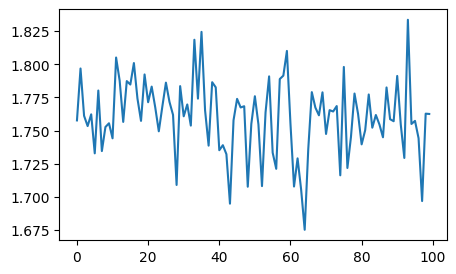

In [ ]:
plt.figure(figsize=(5, 3))
plt.plot(loss)
plt.show()

--Testing... got 5 out of 15 correctly accuracy=(33.33%)


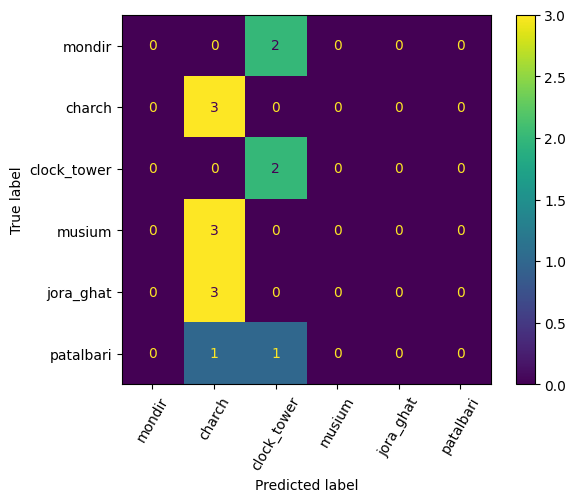

33.333333333333336

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def eval_model_on_test(model, test_loader, display_labels):
    model.eval()  # Set the model to evaluation mode
    pred_correctly = 0
    total = 0
    actual_labels = []
    predicted_labels = []

    with torch.no_grad():
        for i_image, i_label in test_loader:
            i_image = i_image.to(DEVICE)
            i_label = i_label.to(DEVICE)

            total += i_label.size(0) # number of samples in the current batch
            output = model(i_image)

            # get predicted class index (max probability) for each image in the batch
            _, predicted = torch.max(output.data, 1) # its indx along (dimension 1,which corresponds to the class scores).
            pred_correctly += (predicted == i_label).sum().item() # total count of correctly predicted samples.

            # Collect actual_labels & pridected_labels for confusion matrix
            actual_labels.extend(i_label.cpu().numpy()) # tensor -> NP array and extending the list.
            predicted_labels.extend(predicted.cpu().numpy())

    accuracy = 100.0 * pred_correctly / total
    print(f'--Testing... got {pred_correctly} out of {total} correctly accuracy=({accuracy:.2f}%)')

    # Generate and display confusion matrix
    ConfusionMatrixDisplay(
        confusion_matrix=confusion_matrix(actual_labels, predicted_labels),
        display_labels=display_labels
    ).plot()
    plt.xticks(rotation=60)
    plt.show()
    return accuracy



eval_model_on_test(MODEL, test_loader, test_dataset.class_to_idx)